In [229]:


import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from IPython.display import display

pd.options.display.max_columns = None
pd.options.display.max_rows = 100

import numpy as np
from sklearn.impute import SimpleImputer

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
from sklearn.linear_model import LogisticRegression


In [230]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
X, y = make_regression(n_samples=48, n_features=30, noise=10, random_state=42)

X = scaler.fit_transform(X)
lr = LinearRegression()


Xt,Xv,yt,yv = train_test_split(X,y,test_size=0.3,random_state=0)

lr.fit(Xt,yt)
print(lr.score(Xt,yt))
print(lr.score(Xv,yv))
print(mean_squared_error(yv,lr.predict(Xv)))

rig = RidgeCV(alphas = [0.001,0.5,1,3,5,10,50,70,100,200,300],cv=5)
rig.fit(Xt,yt)

print(rig.alpha_)

print(rig.score(Xt,yt))
print(rig.score(Xv,yv))
print(mean_squared_error(yv,rig.predict(Xv)))

las = LassoCV(alphas = [0.001,0.5,1,3,5,10,50,70,100,200,300],cv=5)
las.fit(Xt,yt)

print(las.alpha_)

print(las.score(Xt,yt))
print(las.score(Xv,yv))
print(mean_squared_error(yv,las.predict(Xv)))


figdict1 = {'Set':['48 Samples, 30 Features','48 Samples, 30 Features','48 Samples, 30 Features'],
            'Name':['LinearRegression','RidgeCV','LassoCV'],
            'Training R2':[lr.score(Xt,yt),rig.score(Xt,yt),las.score(Xt,yt)],
           'Val R2': [lr.score(Xv,yv),rig.score(Xv,yv),las.score(Xv,yv)],
           'MSE':[mean_squared_error(yv,lr.predict(Xv)),mean_squared_error(yv,rig.predict(Xv)),mean_squared_error(yv,las.predict(Xv))]}

df1 = pd.DataFrame(figdict1)
display(df1.head())

0.99992911198879
0.8856740297476687
4912.5041692177065
0.5
0.9988948683429519
0.9649551649277968
1505.851190431816
0.5
0.9993299978800112
0.9817743734738866
783.1419763901908


,Set,Name,Training R2,Val R2,MSE
0,"48 Samples, 30 Features",LinearRegression,0.999929,0.885674,4912.504169
1,"48 Samples, 30 Features",RidgeCV,0.998895,0.964955,1505.851190
2,"48 Samples, 30 Features",LassoCV,0.999330,0.981774,783.141976


1.0
0.28983566746292255
18893.808497489637
50.0
0.9263951299490965
0.2737345330875902
19322.17660264788


,Set,Name,Training R2,Val R2,MSE
0,"100 Samples, 120 Features",LinearRegression,1.000000,0.289836,18893.808497
1,"100 Samples, 120 Features",RidgeCV,0.926395,0.273735,19322.176603


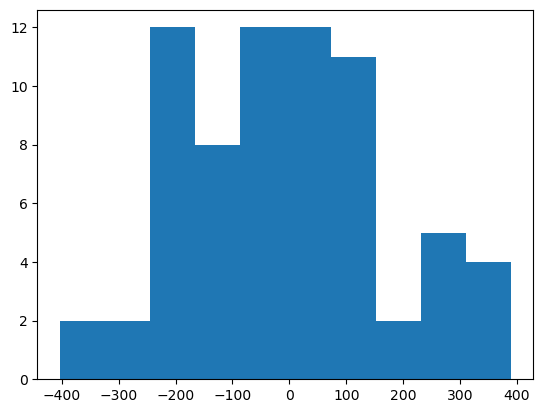

In [231]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
X, y = make_regression(n_samples=100, n_features=120, noise=10, random_state=42)

X = scaler.fit_transform(X)

lr = LinearRegression()


Xt,Xv,yt,yv = train_test_split(X,y,test_size=0.3,random_state=0)
# plt.hist(yt)

lr.fit(Xt,yt)
print(lr.score(Xt,yt))
print(lr.score(Xv,yv))
print(mean_squared_error(yv,lr.predict(Xv)))

rig = RidgeCV(alphas = [0.001,0.5,1,3,5,10,50,70,100,200,300],cv=5)
rig.fit(Xt,yt)

print(rig.alpha_)

print(rig.score(Xt,yt))
print(rig.score(Xv,yv))
print(mean_squared_error(yv,rig.predict(Xv)))

figdict2 = {'Set':['100 Samples, 120 Features','100 Samples, 120 Features'],
            'Name':['LinearRegression','RidgeCV'],
            'Training R2':[lr.score(Xt,yt),rig.score(Xt,yt)],
           'Val R2': [lr.score(Xv,yv),rig.score(Xv,yv)],
           'MSE':[mean_squared_error(yv,lr.predict(Xv)),mean_squared_error(yv,rig.predict(Xv))]}

df2 = pd.DataFrame(figdict2)
display(df2.head())

In [232]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
X, y = make_regression(n_samples=100, n_features=120, noise=10, random_state=42)

X = scaler.fit_transform(X)

lr = LinearRegression()


Xt,Xv,yt,yv = train_test_split(X,y,test_size=0.3,random_state=0)

lr.fit(Xt,yt)
print(lr.score(Xt,yt))
print(lr.score(Xv,yv))
print(mean_squared_error(yv,lr.predict(Xv)))

las = LassoCV(alphas = [0.001,0.5,1,3,5,10,50,70,100,200,300],cv=5)
las.fit(Xt,yt)

print(las.alpha_)

print(las.score(Xt,yt))
print(las.score(Xv,yv))
print(mean_squared_error(yv,las.predict(Xv)))

figdict3 = {'Set':['100 Samples, 120 Features'],
            'Name':['LassoCV'],
            'Training R2':[las.score(Xt,yt)],
           'Val R2': [las.score(Xv,yv)],
           'MSE':[mean_squared_error(yv,las.predict(Xv))]}

df3 = pd.DataFrame(figdict3)
display(df3.head())

finaldf = pd.concat([df1,df2,df3],axis=0)
finaldf.reset_index(inplace=True,drop=True)
display(finaldf)


df_unpivot = pd.melt(finaldf, id_vars=['Set','Name'], value_vars=['Training R2', 'Val R2', 'MSE'])
display(df_unpivot)
# pivottedfinaldf = finaldf.pivot(columns='Name',values=['Training R2','Val R2','MSE'],index='Set')
# display(pivottedfinaldf)

1.0
0.28983566746292255
18893.808497489637
0.5
0.9995705211398004
0.994192033516442
154.52001948359515


,Set,Name,Training R2,Val R2,MSE
0,"100 Samples, 120 Features",LassoCV,0.999571,0.994192,154.520019


,Set,Name,Training R2,Val R2,MSE
0,"48 Samples, 30 Features",LinearRegression,0.999929,0.885674,4912.504169
1,"48 Samples, 30 Features",RidgeCV,0.998895,0.964955,1505.851190
2,"48 Samples, 30 Features",LassoCV,0.999330,0.981774,783.141976
3,"100 Samples, 120 Features",LinearRegression,1.000000,0.289836,18893.808497
4,"100 Samples, 120 Features",RidgeCV,0.926395,0.273735,19322.176603
5,"100 Samples, 120 Features",LassoCV,0.999571,0.994192,154.520019


,Set,Name,variable,value
0,"48 Samples, 30 Features",LinearRegression,Training R2,0.999929
1,"48 Samples, 30 Features",RidgeCV,Training R2,0.998895
2,"48 Samples, 30 Features",LassoCV,Training R2,0.999330
3,"100 Samples, 120 Features",LinearRegression,Training R2,1.000000
4,"100 Samples, 120 Features",RidgeCV,Training R2,0.926395
5,"100 Samples, 120 Features",LassoCV,Training R2,0.999571
6,"48 Samples, 30 Features",LinearRegression,Val R2,0.885674
7,"48 Samples, 30 Features",RidgeCV,Val R2,0.964955
8,"48 Samples, 30 Features",LassoCV,Val R2,0.981774
9,"100 Samples, 120 Features",LinearRegression,Val R2,0.289836


In [233]:
import plotly.express as px
print(finaldf.columns)

df=df_unpivot[df_unpivot.Set=='48 Samples, 30 Features']
df=df[df['variable'] != 'MSE']
display(df)
import plotly.graph_objects as go
fig = px.bar(df, x="Name", y='value',
             color='variable', barmode='group',
)
fig.show()
df=df_unpivot[df_unpivot.Set=='48 Samples, 30 Features']
df=df[df['variable'] == 'MSE']
display(df)
import plotly.graph_objects as go
fig = px.bar(df, x="Name", y='value',
             color='variable', barmode='group',
)
fig.show()


Index(['Set', 'Name', 'Training R2', 'Val R2', 'MSE'], dtype='object')


,Set,Name,variable,value
0,"48 Samples, 30 Features",LinearRegression,Training R2,0.999929
1,"48 Samples, 30 Features",RidgeCV,Training R2,0.998895
2,"48 Samples, 30 Features",LassoCV,Training R2,0.999330
6,"48 Samples, 30 Features",LinearRegression,Val R2,0.885674
7,"48 Samples, 30 Features",RidgeCV,Val R2,0.964955
8,"48 Samples, 30 Features",LassoCV,Val R2,0.981774


,Set,Name,variable,value
12,"48 Samples, 30 Features",LinearRegression,MSE,4912.504169
13,"48 Samples, 30 Features",RidgeCV,MSE,1505.851190
14,"48 Samples, 30 Features",LassoCV,MSE,783.141976


In [234]:
df=df_unpivot[df_unpivot.Set=='100 Samples, 120 Features']
df=df[df['variable'] != 'MSE']
display(df)
import plotly.graph_objects as go
fig = px.bar(df, x="Name", y='value',
             color='variable', barmode='group',
)
fig.show()
df=df_unpivot[df_unpivot.Set=='100 Samples, 120 Features']
df=df[df['variable'] == 'MSE']
display(df)
import plotly.graph_objects as go
fig = px.bar(df, x="Name", y='value',
             color='variable', barmode='group',
)
fig.show()

,Set,Name,variable,value
3,"100 Samples, 120 Features",LinearRegression,Training R2,1.000000
4,"100 Samples, 120 Features",RidgeCV,Training R2,0.926395
5,"100 Samples, 120 Features",LassoCV,Training R2,0.999571
9,"100 Samples, 120 Features",LinearRegression,Val R2,0.289836
10,"100 Samples, 120 Features",RidgeCV,Val R2,0.273735
11,"100 Samples, 120 Features",LassoCV,Val R2,0.994192


,Set,Name,variable,value
15,"100 Samples, 120 Features",LinearRegression,MSE,18893.808497
16,"100 Samples, 120 Features",RidgeCV,MSE,19322.176603
17,"100 Samples, 120 Features",LassoCV,MSE,154.520019
